In [16]:
import pandas as pd
import requests 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell
analyzer = SentimentIntensityAnalyzer()

In [17]:
news_df = pd.read_csv('tsla_cleaned.csv')

final_news = news_df.loc[:,['date','no_sw_cmt']]
final_news['date'] = pd.to_datetime(final_news['date'])
final_news.sort_values(by='date',inplace=True)
final_news

,date,no_sw_cmt
424,2024-01-03 09:26:37,Bullish Lunr
436,2024-01-04 19:23:34,Sounds similar strategy Except buy ones rated ...
426,2024-01-04 19:27:57,thanks turn stone
438,2024-01-08 14:49:47,Agreed worth time
363,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...
...,...,...
252,2024-01-30 10:08:37,Tesla haters basically cult every single time ...
199,2024-01-30 10:09:18,scary thing worth multiples today
205,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...
656,2024-01-30 13:27:24,Lol Day traded today tsla long side today


In [18]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [19]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["date"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_37184\116486405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)


,date,no_sw_cmt,trading_time,Date
424,2024-01-03 09:26:37,Bullish Lunr,2024-01-03 13:30:00,2024-01-03
363,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...,2024-01-09 13:30:00,2024-01-09
376,2024-01-09 06:41:59,timing hard Could eventually right Sure market...,2024-01-09 13:30:00,2024-01-09
361,2024-01-09 06:44:29,might worst analysis seen lol Please short,2024-01-09 13:30:00,2024-01-09
371,2024-01-09 06:50:01,Market irrational company Honestly short anyth...,2024-01-09 13:30:00,2024-01-09
...,...,...,...,...
1391,2024-01-30 09:58:07,honestly elon laughing earnings call enough si...,2024-01-30 13:30:00,2024-01-30
252,2024-01-30 10:08:37,Tesla haters basically cult every single time ...,2024-01-30 13:30:00,2024-01-30
199,2024-01-30 10:09:18,scary thing worth multiples today,2024-01-30 13:30:00,2024-01-30
205,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...,2024-01-30 13:30:00,2024-01-30


In [20]:
# getting compound for each news headline
cs = []
for row in range(len(final_news)):
    final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)
    cs.append(analyzer.polarity_scores(final_news['no_sw_cmt'].iloc[row])['compound'])

final_news['compound_vader_score'] = cs
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_37184\1586834641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_37184\1586834641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_37184\1586834641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_37184\1586834641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,date,no_sw_cmt,trading_time,Date,compound_vader_score
424,2024-01-03 09:26:37,Bullish Lunr,2024-01-03 13:30:00,2024-01-03,0.0000
363,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...,2024-01-09 13:30:00,2024-01-09,0.8649
376,2024-01-09 06:41:59,timing hard Could eventually right Sure market...,2024-01-09 13:30:00,2024-01-09,0.5574
361,2024-01-09 06:44:29,might worst analysis seen lol Please short,2024-01-09 13:30:00,2024-01-09,0.0000
371,2024-01-09 06:50:01,Market irrational company Honestly short anyth...,2024-01-09 13:30:00,2024-01-09,0.4939
...,...,...,...,...,...
1391,2024-01-30 09:58:07,honestly elon laughing earnings call enough si...,2024-01-30 13:30:00,2024-01-30,0.7351
252,2024-01-30 10:08:37,Tesla haters basically cult every single time ...,2024-01-30 13:30:00,2024-01-30,-0.4939
199,2024-01-30 10:09:18,scary thing worth multiples today,2024-01-30 13:30:00,2024-01-30,-0.3182
205,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...,2024-01-30 13:30:00,2024-01-30,0.1531


In [21]:
final_news = final_news[(final_news[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,date,no_sw_cmt,trading_time,Date,compound_vader_score
0,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...,2024-01-09 13:30:00,2024-01-09,0.8649
1,2024-01-09 06:41:59,timing hard Could eventually right Sure market...,2024-01-09 13:30:00,2024-01-09,0.5574
2,2024-01-09 06:50:01,Market irrational company Honestly short anyth...,2024-01-09 13:30:00,2024-01-09,0.4939
3,2024-01-09 06:51:09,means bet original infinity squeeze,2024-01-09 13:30:00,2024-01-09,0.3182
4,2024-01-09 06:54:43,Tesla automotive company deeply rooted robotic...,2024-01-09 13:30:00,2024-01-09,0.8085
...,...,...,...,...,...
1849,2024-01-30 09:58:07,honestly elon laughing earnings call enough si...,2024-01-30 13:30:00,2024-01-30,0.7351
1850,2024-01-30 10:08:37,Tesla haters basically cult every single time ...,2024-01-30 13:30:00,2024-01-30,-0.4939
1851,2024-01-30 10:09:18,scary thing worth multiples today,2024-01-30 13:30:00,2024-01-30,-0.3182
1852,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...,2024-01-30 13:30:00,2024-01-30,0.1531


In [22]:
# Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)

In [23]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating Vader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-09,0.8779,-0.5423,0.3356
1,2024-01-10,0.9066,-0.8402,0.0664
2,2024-01-11,0.8779,0.0000,0.8779
3,2024-01-15,0.7184,0.0000,0.7184
4,2024-01-16,0.9360,-0.8908,0.0452
5,2024-01-17,0.9349,-0.9590,-0.0241
6,2024-01-18,0.7792,-0.3818,0.3974
7,2024-01-19,0.9337,-0.7783,0.1554
8,2024-01-22,0.9590,-0.8311,0.1279
9,2024-01-23,0.6249,-0.4019,0.2230


In [24]:
#Using final compound VADER scores with threshold to generate trade calls
# VADER trade calls - with threshold
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.20:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.20:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())
print(vader_Buy)
print(vader_Sell)

vader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in vader_Sell:
        vader_sell.append(i)

print(vader_buy)
print(vader_sell)

Trade Call for 2024-01-09 is Buy.
Trade Call for 2024-01-11 is Buy.
Trade Call for 2024-01-15 is Buy.
Trade Call for 2024-01-18 is Buy.
Trade Call for 2024-01-23 is Buy.
Trade Call for 2024-01-24 is Buy.
[datetime.date(2024, 1, 9), datetime.date(2024, 1, 11), datetime.date(2024, 1, 15), datetime.date(2024, 1, 18), datetime.date(2024, 1, 23), datetime.date(2024, 1, 24)]
[]
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]
[]


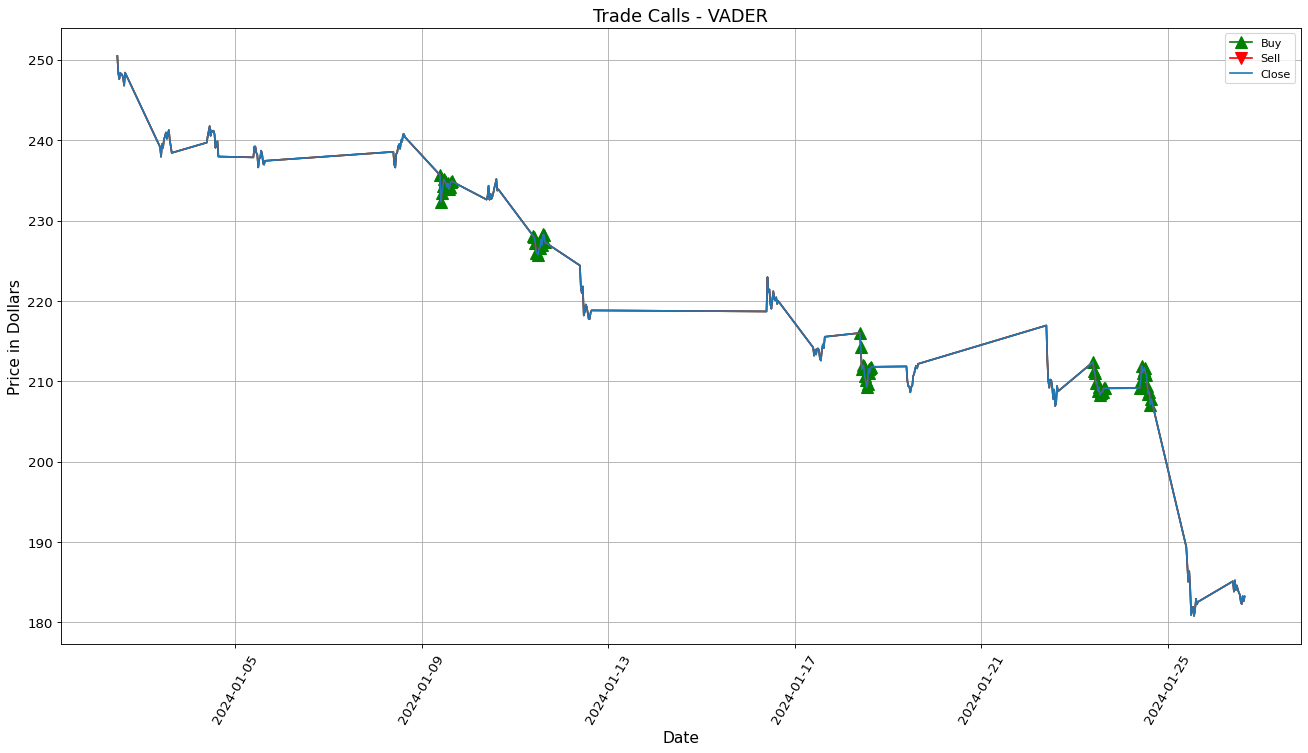

In [25]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=vader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=vader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

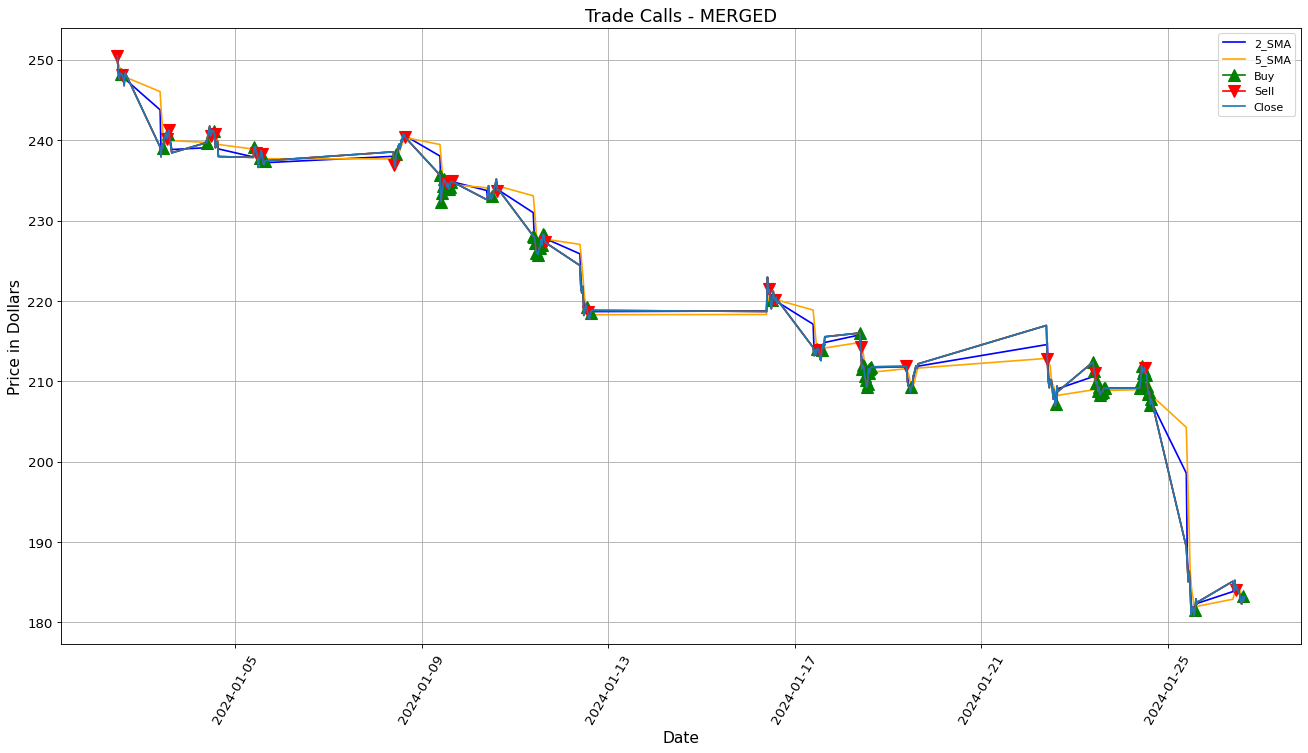

In [26]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

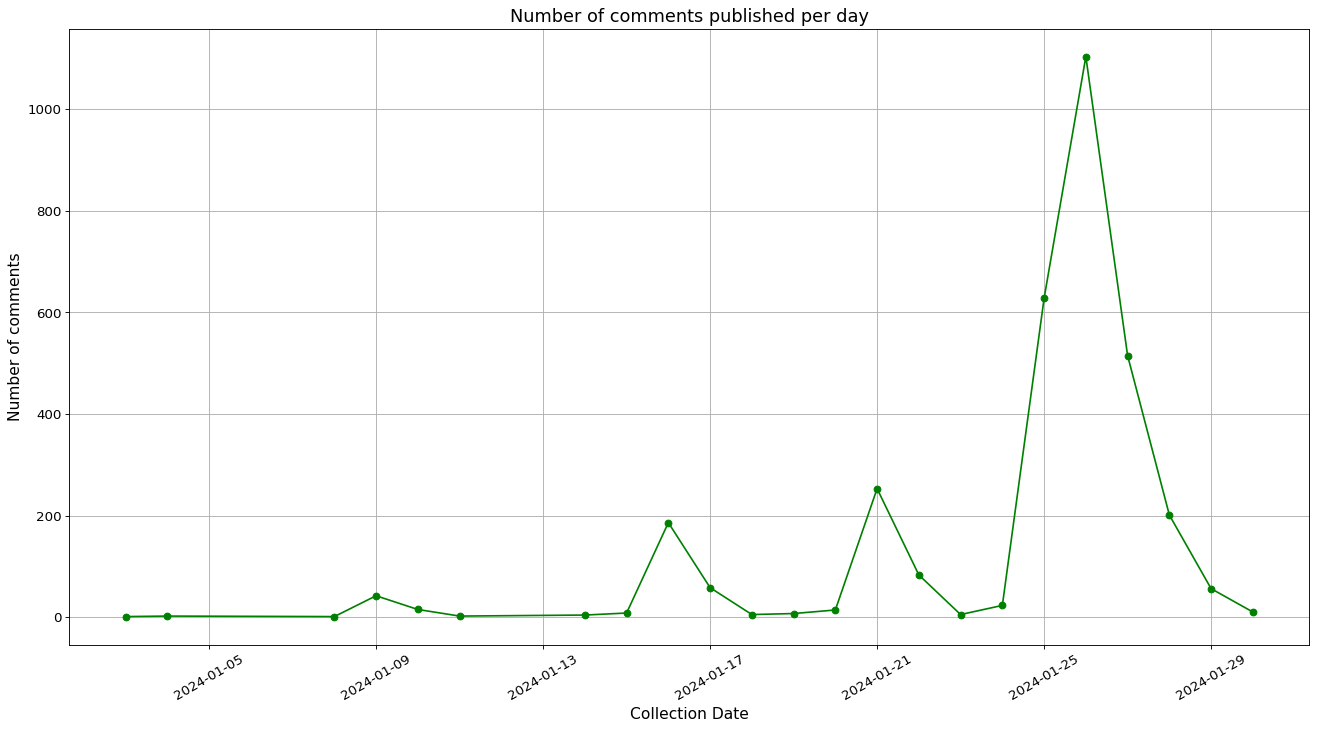

In [27]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['Date'] = news_df['date'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('Date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of comments published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of comments',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

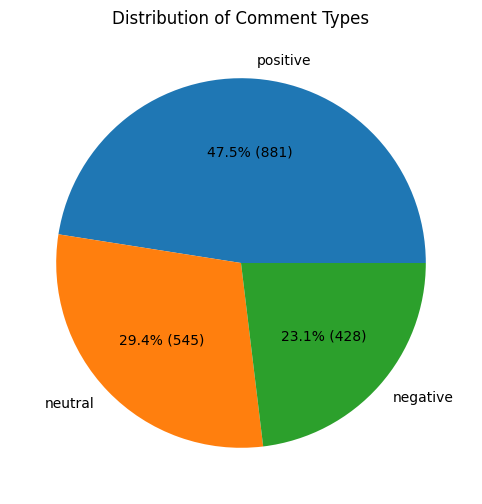

In [28]:
# Phân loại comment
final_news['comment_type'] = final_news['compound_vader_score'].apply(lambda x: 'positive' if x > 0.33 
                                                                         else ('negative' if x < -0.33 
                                                                        else 'neutral'))

# Đếm số lượng comment cho mỗi loại
comment_counts = final_news['comment_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
comment_counts.plot.pie(autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*comment_counts.sum()))
plt.title('Distribution of Comment Types')
plt.ylabel('')
plt.show()

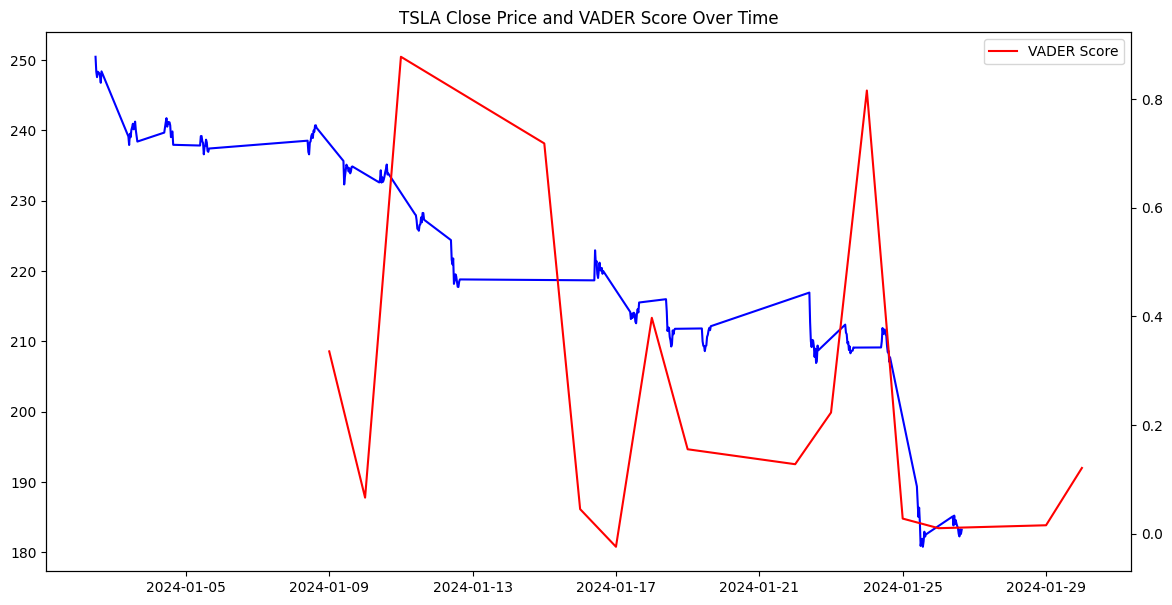

In [29]:
data_tsla = data_tsla.reset_index()
# Đảm bảo rằng cả hai DataFrame đều được sắp xếp theo 'Date' và đặt 'Date' làm index
data_tsla = data_tsla.sort_values('Datetime').set_index('Datetime')
extreme_scores_df = extreme_scores_df.sort_values('Date').set_index('Date')



# Vẽ biểu đồ đường cho giá đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(data_tsla['Close'], label='TSLA Close Price', color='blue')

# Vẽ biểu đồ đường cho điểm FinVADER
# Chúng ta sử dụng plt.twinx() để vẽ biểu đồ trên cùng một hình nhưng với hai trục y khác nhau
plt.twinx()
plt.plot(extreme_scores_df['final_scores'], label='VADER Score', color='red')

plt.title('TSLA Close Price and VADER Score Over Time')
plt.xlabel('Date')
plt.legend()
plt.show()

In [30]:
# Chuyển đổi 'Datetime' và 'Date' thành cùng một định dạng ngày
data_tsla.index = data_tsla.index.date
extreme_scores_df.index = pd.to_datetime(extreme_scores_df.index).date

# Tính toán hệ số tương quan
correlation = data_tsla['Close'].corr(extreme_scores_df['final_scores'])

print(f"The correlation between the TSLA Close Price and the VADER Score is {correlation}")

The correlation between the TSLA Close Price and the VADER Score is 0.3204534855420212


In [31]:
# Kết hợp hai DataFrame bằng cột index
merged_df = data_tsla.join(extreme_scores_df, how='inner')

# Tính toán tương quan giữa SMA và điểm compound
correlation_matrix = merged_df[['2_SMA', '5_SMA', 'final_scores']].corr()

# In ma trận tương quan
print(correlation_matrix)

                 2_SMA     5_SMA  final_scores
2_SMA         1.000000  0.994133      0.320794
5_SMA         0.994133  1.000000      0.320804
final_scores  0.320794  0.320804      1.000000
